In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all';


In [30]:
df = pd.read_csv("survey_results_public.csv", header=0,
                 usecols=[ 'ConvertedComp','Age','CompTotal','WorkWeekHrs', 'CodeRevHrs'  ])

In [32]:
df

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,NaN,NaN,NaN,NaN,14.0
1,NaN,NaN,NaN,NaN,19.0
2,23000.0,8820.0,40.0,NaN,28.0
3,61000.0,61000.0,80.0,NaN,22.0
4,NaN,NaN,55.0,NaN,30.0
...,...,...,...,...,...
2994,NaN,NaN,40.0,4.0,NaN
2995,23000.0,75876.0,45.0,3.0,29.0
2996,NaN,NaN,NaN,NaN,20.0
2997,90000.0,1080000.0,80.0,NaN,31.0


In [33]:
df = df.dropna()

In [34]:
df.dtypes

CompTotal        float64
ConvertedComp    float64
WorkWeekHrs      float64
CodeRevHrs       float64
Age              float64
dtype: object

In [35]:
corr = df.corr()

In [36]:
corr

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,-0.028891,-0.015671,-0.026525,0.016447
ConvertedComp,-0.028891,1.000000,-0.004572,-0.073048,0.099926
WorkWeekHrs,-0.015671,-0.004572,1.000000,0.027850,-0.005370
CodeRevHrs,-0.026525,-0.073048,0.027850,1.000000,-0.039880
Age,0.016447,0.099926,-0.005370,-0.039880,1.000000


In [41]:
corr.style.background_gradient(cmap='PuBu').set_properties(**{'font-size': '0pt'})

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,-0.028891,-0.015671,-0.026525,0.016447
ConvertedComp,-0.028891,1.000000,-0.004572,-0.073048,0.099926
WorkWeekHrs,-0.015671,-0.004572,1.000000,0.027850,-0.005370
CodeRevHrs,-0.026525,-0.073048,0.027850,1.000000,-0.039880
Age,0.016447,0.099926,-0.005370,-0.039880,1.000000


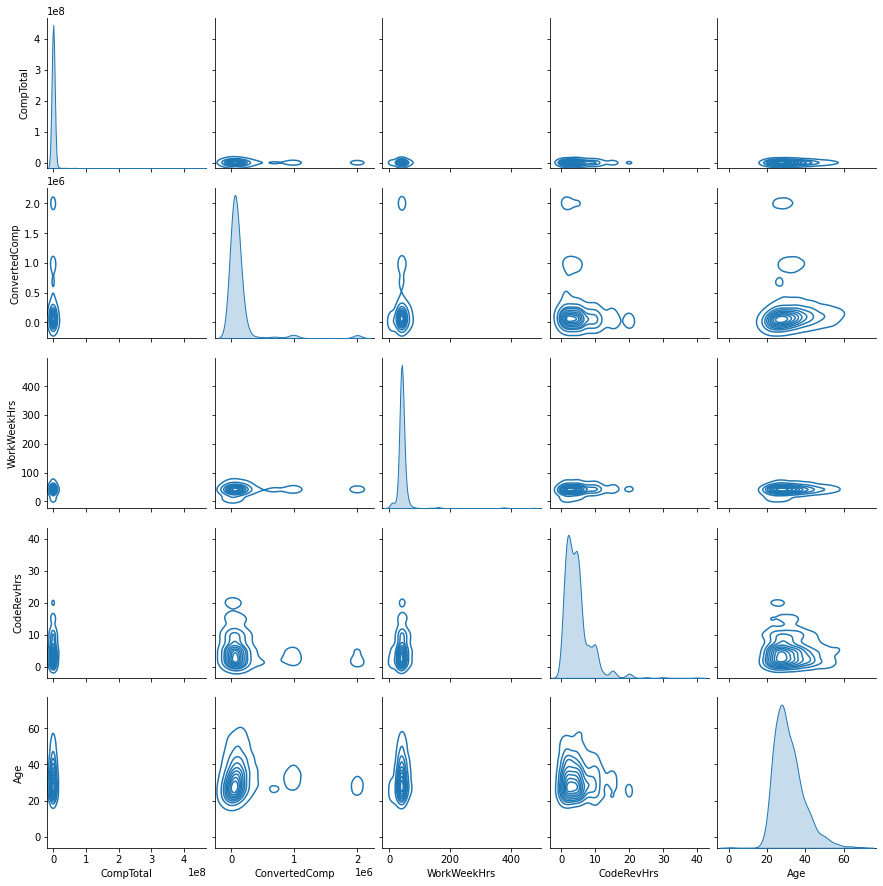

In [43]:
sns.pairplot(df, kind="kde")

In [45]:
df = pd.read_csv("survey_results_public.csv", header=0,
                 usecols=['Hobbyist', "Gender" ])
df = df.dropna()

In [46]:
df

,Hobbyist,Gender
0,Yes,Man
1,No,Man
2,Yes,Man
3,No,Man
4,Yes,Man
...,...,...
2994,Yes,Man
2995,Yes,Man
2996,Yes,Man
2997,Yes,Man


In [47]:
#konwertacja na dane numeryczne:
map_function = {'Yes': 1, 'No': 0}
df['Hobbyist'] = df['Hobbyist'].map(map_function)

In [48]:
df

,Hobbyist,Gender
0,1,Man
1,0,Man
2,1,Man
3,0,Man
4,1,Man
...,...,...
2994,1,Man
2995,1,Man
2996,1,Man
2997,1,Man


In [52]:
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0])], 
                                      remainder='passthrough') 
  
df = np.array(columnTransformer.fit_transform(df), dtype = np.str)

In [53]:
df

array([['0.0', '1.0', 'Man'],
       ['1.0', '0.0', 'Man'],
       ['0.0', '1.0', 'Man'],
       ...,
       ['0.0', '1.0', 'Man'],
       ['0.0', '1.0', 'Man'],
       ['0.0', '1.0', 'Man']], dtype='<U59')